## 多层感知机实现

#### 导入相关库

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### 导入数据

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('mnist_data/', one_hot=True)

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [4]:
print(mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.test.images.shape, mnist.test.labels.shape)

(55000, 784) (55000, 10)
(10000, 784) (10000, 10)


看看我们的手写数据

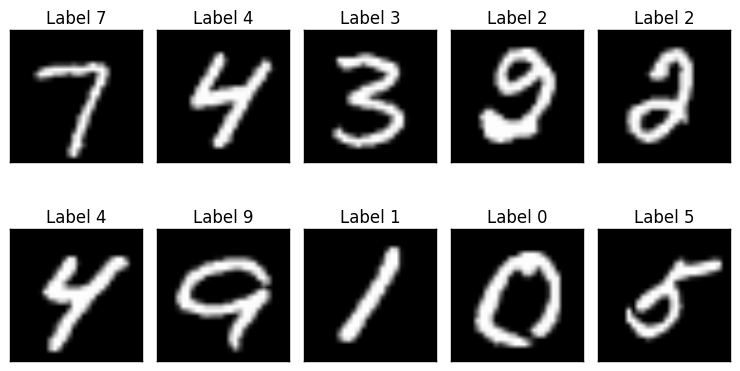

In [5]:
fig = plt.figure(figsize=(7.5, 4.5))
for index, (img, lab) in enumerate(zip(mnist.train.images[100:110], mnist.train.labels[100:110])):
    ax = fig.add_subplot(2, 5, index+1, xticks=[], yticks=[])
    ax.imshow(img.reshape((28, 28)), cmap=plt.cm.gray)
    ax.set_title('Label %d' % np.argmax(lab))
plt.tight_layout()

#### 搭建模型

In [6]:
sess = tf.InteractiveSession()

In [7]:
in_units = 784
h1_units = 300
W1 = tf.Variable(tf.truncated_normal(shape=[in_units, h1_units], stddev=0.1))
b1 = tf.Variable(tf.zeros(shape=[h1_units]))
W2 = tf.Variable(tf.zeros(shape=[h1_units, 10]))
b2 = tf.Variable(tf.zeros(shape=[10]))

In [8]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 784])
y_ = tf.placeholder(dtype=tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(dtype=tf.float32)

In [9]:
hidden1 = tf.nn.relu(tf.matmul(x, W1) + b1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob=keep_prob)
y = tf.nn.softmax(tf.matmul(hidden1_drop, W2) + b2)

In [10]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), axis=1))
train_step = tf.train.AdagradOptimizer(learning_rate=0.3).minimize(cross_entropy)

再定义一个accuracy

In [11]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

开始训练咯，下面总共使用了3000 * 100的元素，相当于对训练集做了五次的epoch。

In [12]:
tf.global_variables_initializer().run()
for step in range(3001):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size=100)
    train_step.run(feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.75})
    if step % 100 == 0:
        print('After step #%4d, accuracy :%.4f' % (step, accuracy.eval(
                    feed_dict={x: mnist.train.images, y_: mnist.train.labels, keep_prob: 1.0})))

After step #   0, accuracy :0.0907
After step # 100, accuracy :0.9140
After step # 200, accuracy :0.9426
After step # 300, accuracy :0.9504
After step # 400, accuracy :0.9564
After step # 500, accuracy :0.9616
After step # 600, accuracy :0.9676
After step # 700, accuracy :0.9723
After step # 800, accuracy :0.9747
After step # 900, accuracy :0.9755
After step #1000, accuracy :0.9771
After step #1100, accuracy :0.9777
After step #1200, accuracy :0.9767
After step #1300, accuracy :0.9793
After step #1400, accuracy :0.9769
After step #1500, accuracy :0.9814
After step #1600, accuracy :0.9836
After step #1700, accuracy :0.9845
After step #1800, accuracy :0.9852
After step #1900, accuracy :0.9847
After step #2000, accuracy :0.9861
After step #2100, accuracy :0.9878
After step #2200, accuracy :0.9894
After step #2300, accuracy :0.9877
After step #2400, accuracy :0.9888
After step #2500, accuracy :0.9887
After step #2600, accuracy :0.9899
After step #2700, accuracy :0.9899
After step #2800, ac

再看看测试集合上的准确率

In [13]:
accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})

0.97790003

没有隐层的softmax regression只能从图像的像素点推断是那个数字，而没有特征抽象的功能。看了上面的效果，是不是觉得MLP很棒，当然啦，上面用到了很多tricks，不过最重要的还是增加了隐层。